# **Grupo 10 **


*   DESSIREE ELIZALDE REINOSO
*   STEVEN CIRINO GARCIA 






Proyecto Final Inteligencia Artificial

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import torch 
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
comercio = pd.read_csv("/content/drive/MyDrive/datasets/indicadores.csv", index_col=0)
comercio.head(10)

,EXPEDIENTE,NOMBRE,RAMA,DESCRIPCIÓN RAMA,RAMA 6 DÍGITOS,SUBRAMA 2 DÍGITOS,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,ENDEUDAMIENTO PATRIMONIAL,...,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE,ROA
AÑO,,,,,,,,,,,,,,,,,,,,,
2018,1,ACEITES TROPICALES SOCIEDAD ANONIMA ATSA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0126.01,A01,2.481571,2.271701,0.031753,0.032794,...,0.000675,0.009573,1.000000,0.726294,0.089992,0.079795,0.009887,0.077261,0.009887,0.009573
2018,258,COMPANIA ECUATORIANA DEL TE CA CETCA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0127.09,A01,2.032407,1.179090,0.581443,1.389159,...,0.015389,0.085338,0.907621,0.664227,0.078237,1.730993,0.203887,0.724520,0.203887,0.085338
2018,554,FURUKAWA PLANTACIONES CA DEL ECUADOR,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0116.05,A01,6.824870,5.269937,0.078561,0.085259,...,0.000000,0.005519,0.443252,0.262013,0.014401,0.108971,0.005989,0.100410,0.005989,0.005519
2018,620,INCUBADORA NACIONAL CA INCA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0146.01,A01,3.048584,2.825042,0.208384,0.263239,...,0.000115,0.073252,0.225131,0.154551,0.028452,0.502641,0.092535,0.397899,0.092535,0.073252
2018,762,LA VINA CIA LTDA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0119.03,A01,22.065985,22.065985,0.002078,0.002082,...,0.000395,0.000213,0.435921,0.021043,0.009496,0.000474,0.000214,0.000473,0.000214,0.000213
2018,1278,CULTIVO DE EXPORTACION SA CULTEX,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0220.01,A02,2.427063,2.366631,0.530710,1.130880,...,0.002837,-0.116038,1.000000,0.202044,-0.363560,0.137413,-0.247263,0.064487,-0.247263,-0.116038
2018,1324,TEXTILES TEXSA SA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0116.05,A01,29.480400,21.873486,0.079278,0.086104,...,0.001388,0.041565,0.566126,0.434134,0.088345,0.221842,0.045144,0.204255,0.045144,0.041565
2018,1342,PIRETRO LATINOAMERICANO CA PIRELA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0128.03,A01,1.417834,1.268602,0.474701,0.903676,...,0.001230,0.019440,0.961852,0.731271,0.032078,0.843641,0.037007,0.443164,0.037007,0.019440
2018,1457,KENNET CA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0113.91,A01,0.899910,0.521510,0.723003,2.610153,...,0.012339,0.007473,0.695461,0.472673,0.008571,1.487724,0.026977,0.412095,0.026977,0.007473


##Pre- Procesamiento 

En esta seccion nos encargaremos de limpiar los datos de saber que datos nos podran ser ayuda para poder implementar en los metodos de inteligencia artifical.

isna() esta funcion esta encargada de buscar todo los valores NaN o valores vacio y con sum() los procederemos a sumar.

In [ ]:
comercio.isna().sum()

EXPEDIENTE                                    0
NOMBRE                                        0
RAMA                                          0
DESCRIPCIÓN RAMA                              0
RAMA 6 DÍGITOS                                0
SUBRAMA 2 DÍGITOS                             0
LIQUIDEZ CORRIENTE                         4703
PRUEBA ÁCIDA                               4703
ENDEUDAMIENTO DEL ACTIVO                    803
ENDEUDAMIENTO PATRIMONIAL                   780
ENDEUDAMIENTO A CORTO PLAZO                4064
ENDEUDAMIENTO A LARGO PLAZO                4064
COBERTURA DE INTERESES                     8809
ENDEUDAMIENTO DEL ACTIVO FIJO              6147
APALANCAMIENTO                              780
APALANCAMIENTO FINANCIERO                  5157
FORTALEZA PATRIMONIAL                       780
ENDEUDAMIENTO PATRIMONIAL CORRIENTE         780
ENDEUDAMIENTO PATRIMONIAL NO CORRIENTE      780
APALANCAMIENTO A CORTO Y LARGO PLAZO        780
ROTACIÓN DE CARTERA                     

Se procedera a la separacion de la rama que se va a utilizar en este caso se utilizara la Rama [A]

In [ ]:
#Cambiar nombre de columnas 
comercio.rename({'AÑO': 'year','EXPEDIENTE': 'expediente','NOMBRE': 'nombre','RAMA': 'rama','DESCRIPCIÓN RAMA': 'descrip_rama',
           'RAMA 6 DÍGITOS': 'rama_digit','SUBRAMA 2 DÍGITOS': 'subrama_digit','LIQUIDEZ CORRIENTE': 'liquidez_corriente',
           'PRUEBA ÁCIDA': 'prueba_acida','ENDEUDAMIENTO DEL ACTIVO': 'endeu_activo','ENDEUDAMIENTO PATRIMONIAL': 'endeu_patri',
           'ENDEUDAMIENTO A CORTO PLAZO': 'endeu_corto','ENDEUDAMIENTO A LARGO PLAZO': 'endeu_largo','COBERTURA DE INTERESES': 'cobertura',
           'ENDEUDAMIENTO DEL ACTIVO FIJO': 'endeu_activo_fijo', 'APALANCAMIENTO': 'apal', 'APALANCAMIENTO FINANCIERO': 'apal_finan',
           'FORTALEZA PATRIMONIAL': 'fortaleza_patri','ENDEUDAMIENTO PATRIMONIAL CORRIENTE': 'endeu_patricorr','ENDEUDAMIENTO PATRIMONIAL NO CORRIENTE': 'endeu_patri_nocorr',
           'APALANCAMIENTO A CORTO Y LARGO PLAZO': 'apal_cort_larg', 'ROTACIÓN DE CARTERA': 'rot_cartera', 'ROTACIÓN DE ACTIVO FIJO': 'rot_actfijo',
           'ROTACIÓN DE VENTAS': 'rot_ventas', 'PERIODO MEDIO DE COBRANZA CORTO PLAZO': 'per_cob_cort', 'PERIODO MEDIO DE PAGO CORTO PLAZO': 'per_pago_cort',
           'IMPACTO GASTOS ADMINISTRACIÓN Y VENTAS': 'imp_gastos', 'IMPACTO DE LA CARGA FINANCIERA': 'imp_cargaf', 'RENTABILIDAD NETA DEL ACTIVO': 'rent_act',
           'MARGEN BRUTO': 'margen_bruto', 'MARGEN OPERACIONAL': 'margen_ope','RENTABILIDAD NETA DE VENTAS': 'rent_ventas',
           'RENTABILIDAD OPERACIONAL DEL PATRIMONIO': 'rent_ope_patri','RENTABLIDAD FINANCIERA': 'rent_finan','RENTABILIDAD_OPERACIONAL_DEL_ACTIVO':'rent_ope_activo'},axis=1,inplace=True)

Revisamos que subrama representa más ingresos al país en el sector A

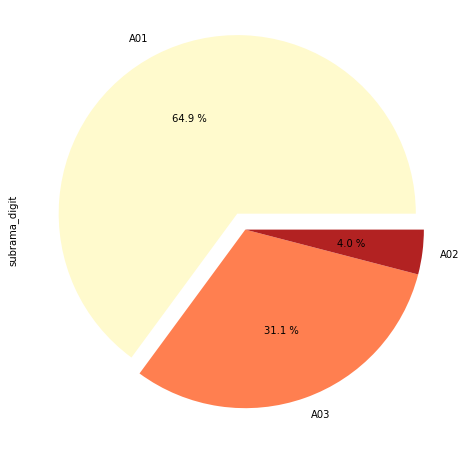

In [ ]:
desfase = (0.1, 0, 0)
colores = ["#FFFACD","#FF7F50","#B22222"]
comercio['subrama_digit'].value_counts().head(3).plot.pie(autopct='%0.1f %%', colors=colores, explode = desfase, figsize=(8,10))

la subrama A01, representa mayores ingresos para el país

In [ ]:
from sklearn.preprocessing import StandardScaler
## Feature Scaling
a = comercio [['liquidez_corriente','prueba_acida','endeu_activo','endeu_patri','endeu_corto','endeu_largo','cobertura', 'endeu_activo_fijo','apal',                             
          'apal_finan','apal_finan','endeu_patricorr','endeu_patri_nocorr', 'apal_cort_larg','rot_cartera','rot_actfijo', 'rot_ventas',               
          'per_cob_cort', 'per_pago_cort', 'imp_gastos', 'imp_cargaf', 'rent_act','margen_bruto','margen_ope', 'rent_ventas', 'rent_ope_patri',
          'rent_finan','ROE','ROA']]
sc_df = StandardScaler()
df_std = sc_df.fit_transform(a.astype(float)) 

Este codigo se especializa en eliminar todas los elementos que tengan un valor NAN en la columan ROE

In [ ]:
a=a[a['ROE'].notna()]

Se procedera a eliminar todos los valores que tengan NAN

In [ ]:
a=a.dropna()

En este parte se vizualizara el tamaño del dataFrame

In [ ]:
a.shape

(4581, 29)

In [ ]:
a.columns

Index(['liquidez_corriente', 'prueba_acida', 'endeu_activo', 'endeu_patri',
       'endeu_corto', 'endeu_largo', 'cobertura', 'endeu_activo_fijo', 'apal',
       'apal_finan', 'apal_finan', 'endeu_patricorr', 'endeu_patri_nocorr',
       'apal_cort_larg', 'rot_cartera', 'rot_actfijo', 'rot_ventas',
       'per_cob_cort', 'per_pago_cort', 'imp_gastos', 'imp_cargaf', 'rent_act',
       'margen_bruto', 'margen_ope', 'rent_ventas', 'rent_ope_patri',
       'rent_finan', 'ROE', 'ROA'],
      dtype='object')

Revisamos los datos del ROE, en que frecuencia nos encontramos

In [ ]:
print(f"Asimetria: {a['ROE'].skew()}")
print(f"Curtosis: {a['ROE'].kurt()}")

Asimetria: -50.36485316583873
Curtosis: 2928.5996130077833


Se procedera a crear una tabla donde el valor sacado de la media si es mayor a -0.460738(Es bueno) y si es menor (es malo) representado con el numero 1 y 0

In [ ]:
a['VALORACION'] = np.where(a['ROE']>-0.460738, 1,0)
a['VALORACION'].value_counts()

1    4150
0     431
Name: VALORACION, dtype: int64

In [ ]:
a['VALORACION'] = np.where(a['ROA']>-0.460738, 1,0)
a['VALORACION'].value_counts()

1    4525
0      56
Name: VALORACION, dtype: int64

 RECORDATORIO Negativo: cuando el ROE es inferior al ROA. Esto indica que, el coste medio de la deuda es superior a la rentabilidad económica.

Calculo de frecuencia sobre la columna ROE

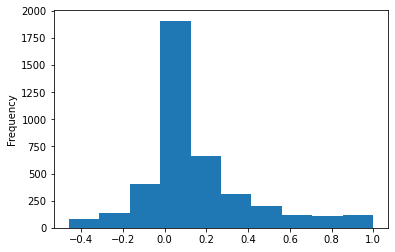

In [ ]:
a[(a['ROE']>=-0.460738) & (a['ROE']<=1)]['ROE'].plot.hist(bins=10)

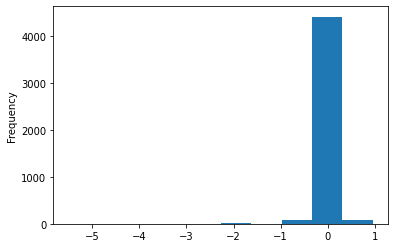

In [ ]:
a['ROA'].plot.hist(bins=10)

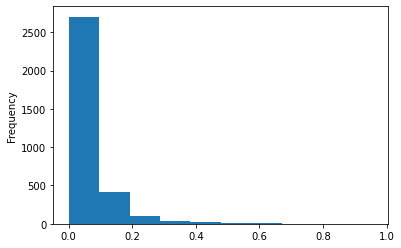

In [ ]:
a[(a['ROA']>=0) & (a['ROA']<=1)]['ROA'].plot.hist(bins=10)

**Mapas de correlacional y mapas de calor**

In [ ]:
Corr1= a[['endeu_activo','endeu_activo_fijo','endeu_patri','imp_cargaf','ROE','ROE']]
Corr2= a[['margen_bruto','margen_ope','apal_finan','ROA','ROE']]
Corr3= a[["endeu_activo","endeu_patricorr","endeu_corto","endeu_largo","apal","rot_ventas","ROE"]]

Text(0.5, 1.0, 'mapa de calor ')

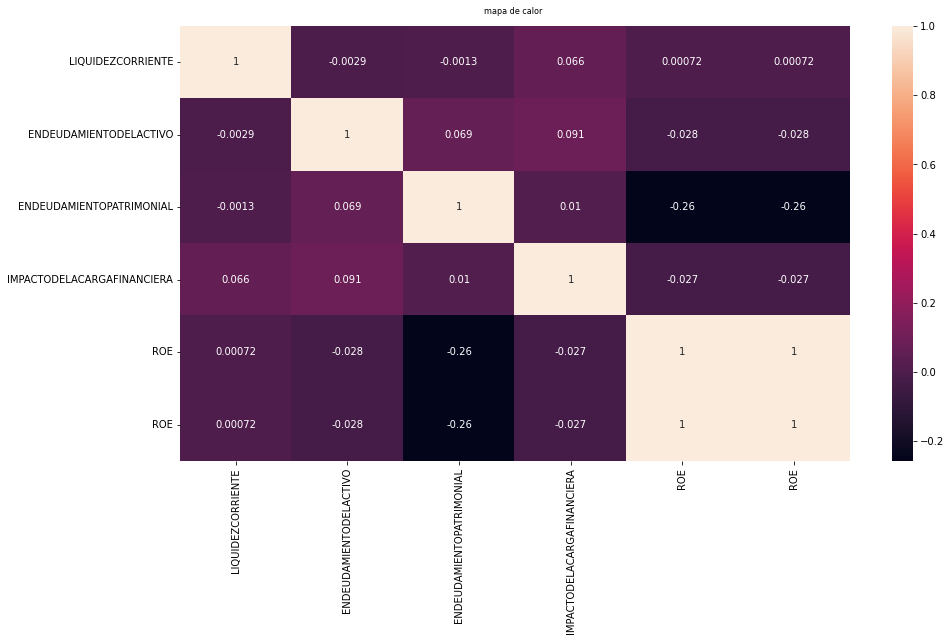

In [ ]:
plt.figure(figsize=(15,8))
hm = sns.heatmap(Corr1.corr(),annot=True)
hm.set_title('mapa de calor ',fontdict={'fontsize':8},pad=12)

Text(0.5, 1.0, 'mapa de calor ')

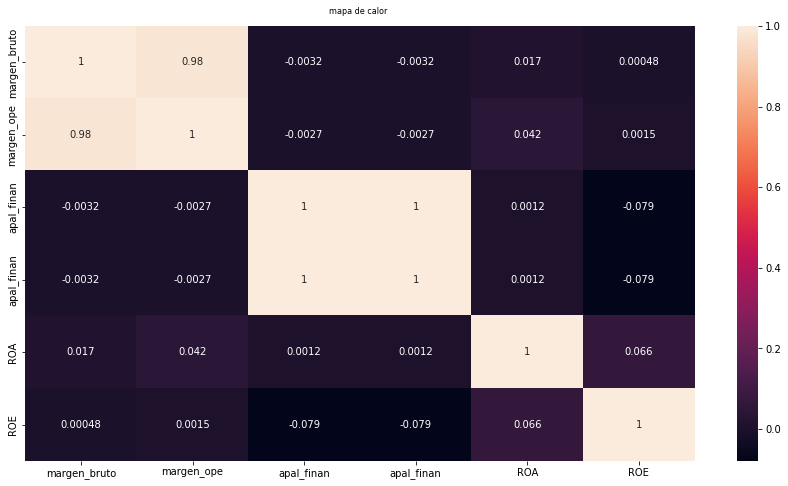

In [ ]:
plt.figure(figsize=(15,8))
hm = sns.heatmap(Corr2.corr(),annot=True)
hm.set_title('mapa de calor ',fontdict={'fontsize':8},pad=12)

Text(0.5, 1.0, 'mapa de calor ')

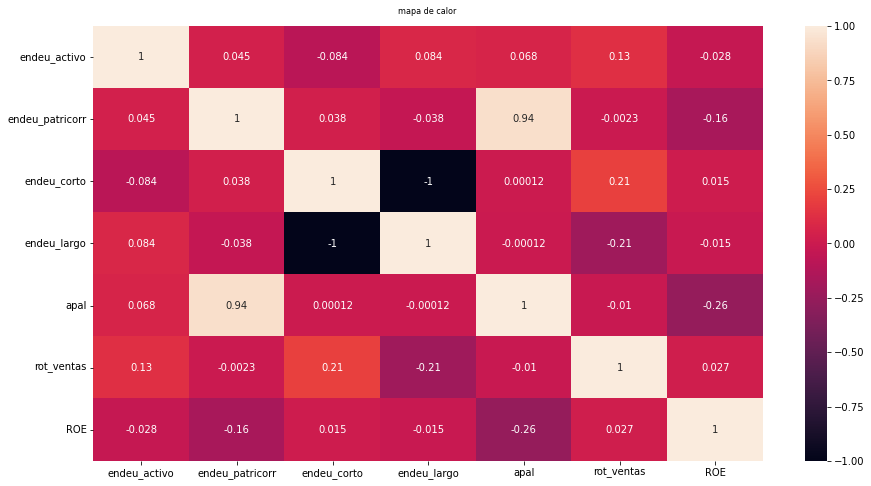

In [ ]:
plt.figure(figsize=(15,8))
hm = sns.heatmap(Corr3.corr(),annot=True)
hm.set_title('mapa de calor ',fontdict={'fontsize':8},pad=12)

In [ ]:
Corr3

,endeu_activo,endeu_patricorr,endeu_corto,endeu_largo,apal,rot_ventas,ROE
AÑO,,,,,,,
2018,0.581443,0.184929,0.373141,0.626859,2.389159,1.090772,0.203887
2018,0.208384,0.175094,0.837381,0.162619,1.263239,2.574553,0.092535
2018,0.079278,0.007733,0.276957,0.723043,1.086104,0.470487,0.045144
2018,0.474701,0.259551,0.346334,0.653666,1.903676,0.606019,0.037007
2018,0.723003,1.253004,0.567799,0.432201,3.610153,0.871840,0.026977
...,...,...,...,...,...,...,...
2020,5.699902,0.000000,0.010202,0.989798,0.212770,3.593479,-1.171038
2020,0.342392,0.422615,1.000000,0.000000,1.520663,0.646106,0.063746
2020,0.994740,98.907516,0.663385,0.336615,190.109300,1.225062,0.559490


##Regresion Logistica

In [ ]:
Corr3.size

32067

In [ ]:
class transformacion(torch.utils.data.Dataset):
  def __init__(self, file_name):
    file_out =file_name 
    X = file_out.iloc[:, :-1].values
    y = file_out.iloc[:, -1:].values

    sc=StandardScaler()
    self.X = sc.fit_transform(X)
    self.y = y

    X=torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y)

  def __len__(self):
   return len(self.y)
  
  def __getitem__(self, i):
   return self.X[i], self.y[i]

In [ ]:
dataset = transformacion(Corr3)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(dataset.X,dataset.y, test_size=0.2,random_state=0)

In [ ]:
x_train=torch.from_numpy(x_train.astype(np.float32))
x_test=torch.from_numpy(x_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32))
y_test=torch.from_numpy(y_test.astype(np.float32))

In [ ]:
y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)

In [ ]:
class Logistic_Reg_model(torch.nn.Module):
 def __init__(self,no_input_features):
   super(Logistic_Reg_model,self).__init__()
   self.layer1=torch.nn.Linear(no_input_features,20)
   self.layer2=torch.nn.Linear(20,1)
 def forward(self,x):
   y_predicted=self.layer1(x)
   y_predicted=torch.sigmoid(self.layer2(y_predicted))
   return y_predicted

In [ ]:
model=Logistic_Reg_model(6)

In [ ]:
criterion=torch.nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [ ]:
number_of_epochs=100
for epoch in range(number_of_epochs):
 y_prediction=model(x_train)
 loss=criterion(y_prediction,y_train)
 loss.backward()
 optimizer.step()
 optimizer.zero_grad()
 if (epoch+1)%10 == 0:
   print('epoch:', epoch+1,',loss=',loss.item())

epoch: 10 ,loss= 1.1682568788528442
epoch: 20 ,loss= 1.049324631690979
epoch: 30 ,loss= 0.9943089485168457
epoch: 40 ,loss= 0.9728281497955322
epoch: 50 ,loss= 0.9584953188896179
epoch: 60 ,loss= 0.946660041809082
epoch: 70 ,loss= 0.9360731244087219
epoch: 80 ,loss= 0.9262802004814148
epoch: 90 ,loss= 0.9170804619789124
epoch: 100 ,loss= 0.9083712100982666


In [ ]:
with torch.no_grad():
 y_pred=model(x_test)
 y_pred_class=y_pred.round()
 accuracy=(y_pred_class.eq(y_test).sum())/float(y_test.shape[0])
 print(accuracy.item())

0.004362049978226423


##Regresion Lineal


In [ ]:
Corr3

,endeu_activo,endeu_patricorr,endeu_corto,endeu_largo,apal,rot_ventas,ROE
AÑO,,,,,,,
2018,0.581443,0.184929,0.373141,0.626859,2.389159,1.090772,0.203887
2018,0.208384,0.175094,0.837381,0.162619,1.263239,2.574553,0.092535
2018,0.079278,0.007733,0.276957,0.723043,1.086104,0.470487,0.045144
2018,0.474701,0.259551,0.346334,0.653666,1.903676,0.606019,0.037007
2018,0.723003,1.253004,0.567799,0.432201,3.610153,0.871840,0.026977
...,...,...,...,...,...,...,...
2020,5.699902,0.000000,0.010202,0.989798,0.212770,3.593479,-1.171038
2020,0.342392,0.422615,1.000000,0.000000,1.520663,0.646106,0.063746
2020,0.994740,98.907516,0.663385,0.336615,190.109300,1.225062,0.559490


In [ ]:
Corr4=Corr3

In [ ]:
Corr4['VALORACION']=a['VALORACION']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Corr4

,endeu_activo,endeu_patricorr,endeu_corto,endeu_largo,apal,rot_ventas,ROE,VALORACION
AÑO,,,,,,,,
2018,0.581443,0.184929,0.373141,0.626859,2.389159,1.090772,0.203887,1
2018,0.208384,0.175094,0.837381,0.162619,1.263239,2.574553,0.092535,1
2018,0.079278,0.007733,0.276957,0.723043,1.086104,0.470487,0.045144,1
2018,0.474701,0.259551,0.346334,0.653666,1.903676,0.606019,0.037007,1
2018,0.723003,1.253004,0.567799,0.432201,3.610153,0.871840,0.026977,1
...,...,...,...,...,...,...,...,...
2020,5.699902,0.000000,0.010202,0.989798,0.212770,3.593479,-1.171038,0
2020,0.342392,0.422615,1.000000,0.000000,1.520663,0.646106,0.063746,1
2020,0.994740,98.907516,0.663385,0.336615,190.109300,1.225062,0.559490,1


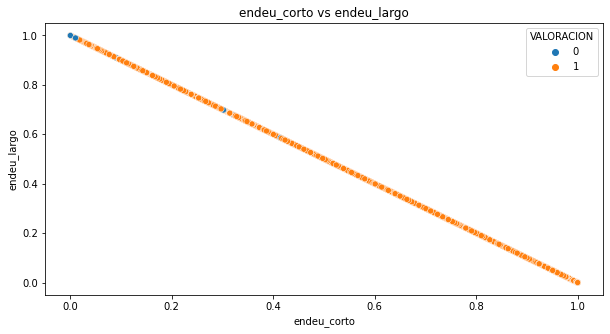

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))

plt.title('endeu_corto vs endeu_largo')
sns.scatterplot(x=Corr4['endeu_corto'],y=Corr4['endeu_largo'],hue=Corr4['VALORACION'])
plt.xlabel('endeu_corto')
plt.ylabel('endeu_largo')

plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


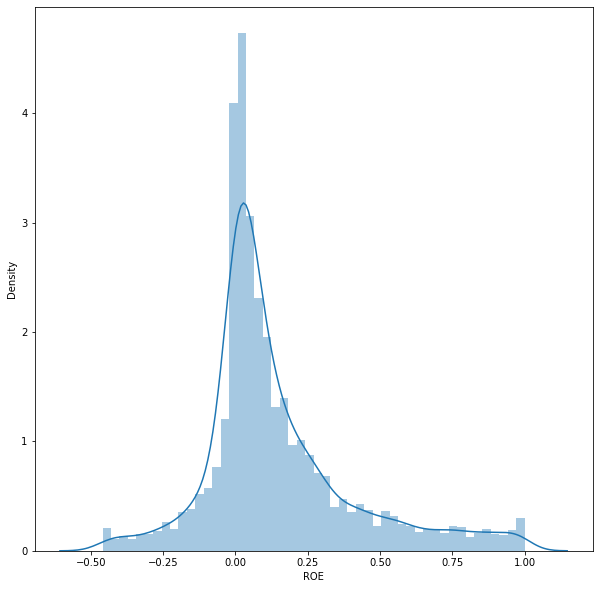

In [ ]:
import seaborn as seabornInstance 
plt.figure(figsize=(10,10))
plt.tight_layout()
seabornInstance.distplot(Corr4[(Corr4['ROE']>=-0.460738) & (Corr4['ROE']<=1)]['ROE'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


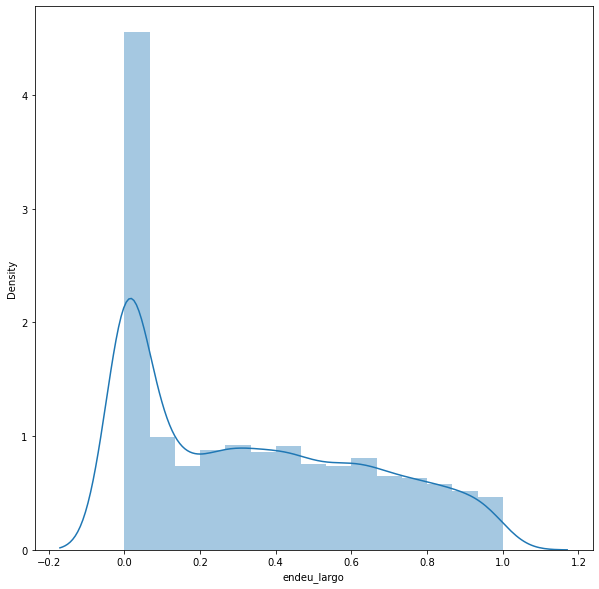

In [ ]:
plt.figure(figsize=(10,10))
plt.tight_layout()
seabornInstance.distplot(Corr4['endeu_largo'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


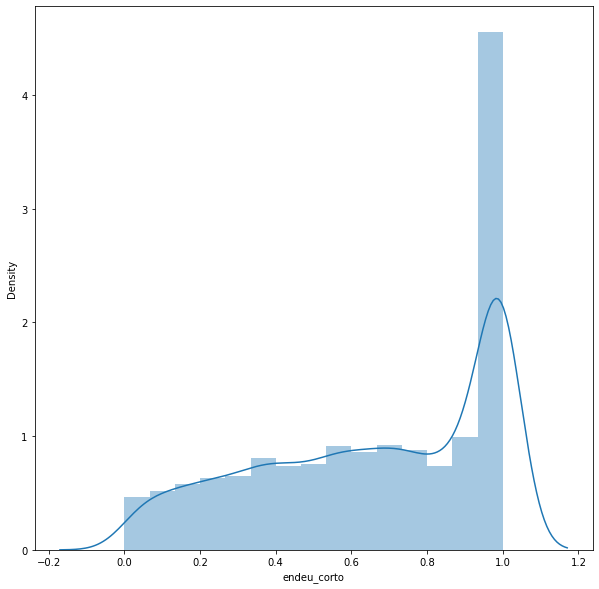

In [ ]:
plt.figure(figsize=(10,10))
plt.tight_layout()
seabornInstance.distplot(Corr4['endeu_corto'])

In [ ]:
#[["ENDEUDAMIENTODELACTIVO","ENDEUDAMIENTOPATRIMONIAL","ENDEUDAMIENTOACORTOPLAZO","ENDEUDAMIENTOALARGOPLAZO","APALANCAMIENTO","ROTACIÓNDEVENTAS","ROE"]]
X = Corr4['endeu_corto'].values.reshape(-1,1)
y = Corr4['ROE'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train) #Entrena el algoritmo 

LinearRegression()

In [ ]:
#Para obtener el intercepto:
print('intercepto: ',regressor.intercept_)
#Para obtener la pendiente
print('Pendiente ',regressor.coef_)

intercepto:  [-0.84021944]
Pendiente  [[0.64746336]]


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.001472,-0.192756
1,-0.020541,-0.196164
2,0.122339,-0.290970
3,-0.012295,-0.414875
4,0.079645,-0.393057
...,...,...
912,0.670814,-0.254586
913,0.085192,-0.537708
914,0.284360,-0.226870
915,0.070895,-0.315946


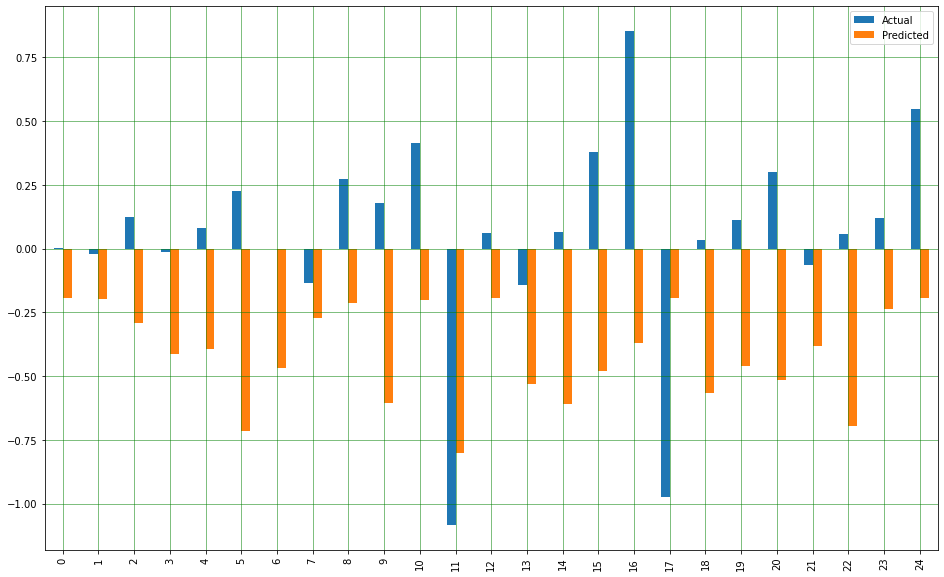

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

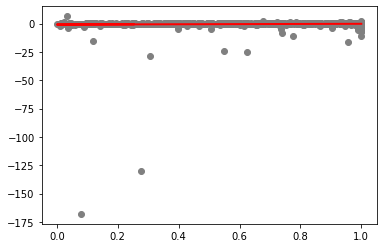

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
from sklearn import metrics 

print('Error Absoluto Medio:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Error Cuadratico Medio:', metrics.mean_squared_error(y_test, y_pred)) 
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Error Absoluto Medio: 1.108534899432841
Error Cuadratico Medio: 52.41958422793307
Raíz del error cuadrático medio: 7.240137031019032


con multiples varaibles


In [ ]:

#Vamos a intentar mejorar el Modelo, con una dimensión más: 
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes
#[["ENDEUDAMIENTODELACTIVO","ENDEUDAMIENTOPATRIMONIAL","ENDEUDAMIENTOACORTOPLAZO","ENDEUDAMIENTOALARGOPLAZO","APALANCAMIENTO","ROTACIÓNDEVENTAS","ROE"]]

suma = ( Corr4['endeu_activo']+Corr4['endeu_patricorr']+Corr4['endeu_corto'] + Corr4['endeu_largo']+Corr4['rot_ventas'].fillna(0)+ Corr4['apal'])
 
dataX2 =  pd.DataFrame()
dataX2["ROE"] = Corr4["ROE"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = Corr4['VALORACION'].values

In [ ]:
dataX2

,ROE,suma
AÑO,,
2018,0.203887,5.246303
2018,0.092535,5.221271
2018,0.045144,2.643602
2018,0.037007,4.243947
2018,0.026977,7.458000
...,...,...
2020,-1.171038,10.506152
2020,0.063746,3.931776
2020,0.559490,292.236618


In [ ]:


regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
 
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [2.19918722e-04 2.88507779e-06]
Mean squared error: 0.01
Variance score: 0.00


#El perceptrón multicapa o MLP (Multi-Layer Perceptron)

In [ ]:
dataset = transformacion(Corr3)
dataset_size = len(Corr3)
batch_size=32
test_size = int(0.8 * dataset_size)
train_size = dataset_size - test_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset,
                                               [train_size, test_size])

train_loader = DataLoader(
        train_dataset.dataset,
        batch_size=batch_size,
        shuffle=True)
test_loader = DataLoader(
        test_dataset.dataset,
        batch_size=batch_size,
        shuffle=True)

In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(7, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 5)
        )
  def forward(self, x):
     return self.layers(x)

In [ ]:
mlp = MLP()
# Define the loss function and optimizer
loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

In [ ]:
def mse_loss(y_hat,y_real):
  dif= y_hat - y_real
  return torch.sum(dif*dif)/dif.numel()

In [ ]:
# Run the training loop
for epoch in range(0, 20): # 5 epochs at maximum
    
    # Print epoch
    print(f'Starting epoch {epoch+1}')
    
    # Set current loss value
    current_loss = 0.0
    
    # Iterate over the DataLoader for training data
    mlp.train()
    for i, data in enumerate(train_loader, 0):
      
      # Get and prepare inputs
      inputs, targets = data
      inputs, targets = inputs.float(), targets.float()
      targets = targets.reshape((targets.shape[0], 1))
      
      # Zero the gradients
      optimizer.zero_grad()
      
      # Perform forward pass
      outputs = mlp(inputs)
      
      # Compute loss
      loss = loss_function(outputs, targets)
      
      # Perform backward pass
      loss.backward()
      
      # Perform optimization
      optimizer.step()
      
      # Print statistics
      current_loss += loss.item()
      if i % 100 == 0:
        #  print('Loss after mini-batch %5d: %.3f' %
         #       (i + 1, current_loss / 100))
          current_loss = 0.0
#------------------------------------------------------------------
    mlp.eval() 
    with torch.no_grad():
      
      #y_all_real=[]
      #y_all_hat=[]
      current_error=0.0
      acum=0
      for i, data in enumerate(test_loader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        #xtest=xtest.float()
        #ytest=ytest.float()
        test_y = mlp(inputs)
        error=mse_loss(test_y,targets)
        current_error+=error
        acum+=1
  
      print('mse error after epoch %5d: %.3f' %
          (epoch, current_error / acum))
            
            
          
          #print('mse: %.3f' %error)

          #y_all_real.append(ytest)#= np.array(ytest)
         # y_all_hat.append(test_y)
        
        #y_all_hat.plot.hist(bins=10)

        
  # Process is complete.
print('Training process has finished.')


Starting epoch 1


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([5, 1])) that is different to the input size (torch.Size([5, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


mse error after epoch     0: 0.664
Starting epoch 2
mse error after epoch     1: 0.296
Starting epoch 3
mse error after epoch     2: 0.214
Starting epoch 4
mse error after epoch     3: 0.139
Starting epoch 5
mse error after epoch     4: 0.086
Starting epoch 6
mse error after epoch     5: 0.053
Starting epoch 7
mse error after epoch     6: 0.040
Starting epoch 8
mse error after epoch     7: 0.031
Starting epoch 9
mse error after epoch     8: 0.024
Starting epoch 10
mse error after epoch     9: 0.020
Starting epoch 11
mse error after epoch    10: 0.017
Starting epoch 12
mse error after epoch    11: 0.015
Starting epoch 13
mse error after epoch    12: 0.013
Starting epoch 14
mse error after epoch    13: 0.012
Starting epoch 15
mse error after epoch    14: 0.011
Starting epoch 16
mse error after epoch    15: 0.011
Starting epoch 17
mse error after epoch    16: 0.010
Starting epoch 18
mse error after epoch    17: 0.010
Starting epoch 19
mse error after epoch    18: 0.010
Starting epoch 20
m